In [1]:
import pandas as pd
water = pd.read_csv('water-treatment.data', header= -1)
water.columns = ['NUL','Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E',
    'SSV_E', 'SED_E', 'COND_E', 'PH_P', 'DBO_P', 'SS_P', 'SSV_P', 'SED_P', 'COND_P',
    'PH_D', 'DBO_D', 'DQO_D', 'SS_D', 'SSV_D', 'SED_D' , 'COND_D', 'PH_S', 'DBO_S',
    'DQO_S', 'SS_S', 'SSV_S', 'SED_S', 'COND_S', 'RD_DBO_P', 'RD_SS_P', 'RD_SED_P',
    'RD_DBO_S', 'RD_DQO_S', 'RD_DBO_G', 'RD_DQO_G', 'RD_SS_G', 'RD_SED_G' ]

In [2]:
newater = water.drop(['NUL'],axis=1)
newater.head()
import numpy as np
nan = np.nan
newater1 = newater.replace(to_replace ="?", value ='NaN')

In [3]:
from missingpy import KNNImputer

imputer = KNNImputer()
X_imputed = imputer.fit_transform(newater1)

c:\users\sagar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
c:\users\sagar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


In [6]:
from sklearn.feature_selection import VarianceThreshold 
selector = VarianceThreshold()
data = pd.DataFrame(selector.fit_transform(X_imputed))

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
pca_components = pd.DataFrame(reduced)

Text(0, 0.5, 'PCA 2')

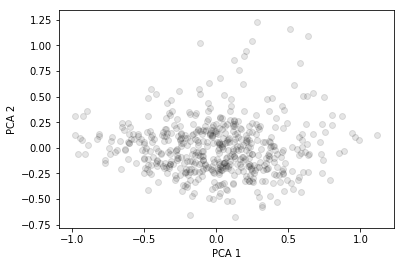

In [12]:
import matplotlib.pyplot as plt
plt.scatter(pca_components[0], pca_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

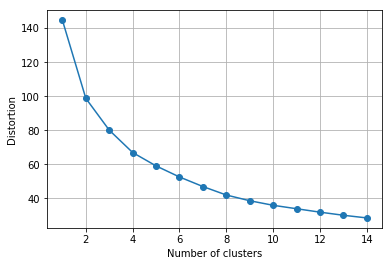

In [14]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1, 15):
    km2 = KMeans(
        n_clusters=i, init='random',
        n_init=50, max_iter=200,
        tol=1e-04, random_state=0
    )
    km2.fit(pca_components.iloc[:,:3])
    distortions.append(km2.inertia_)

# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(b=None)
plt.show()

In [15]:
reduced = pd.DataFrame(reduced)

In [18]:
from sklearn.cluster import KMeans

km2 = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=200, 
    tol=1e-04, random_state=0
)
y_km2 = km2.fit_predict(pca_components.iloc[:,:3])
X2 = pca_components.iloc[:,:2]


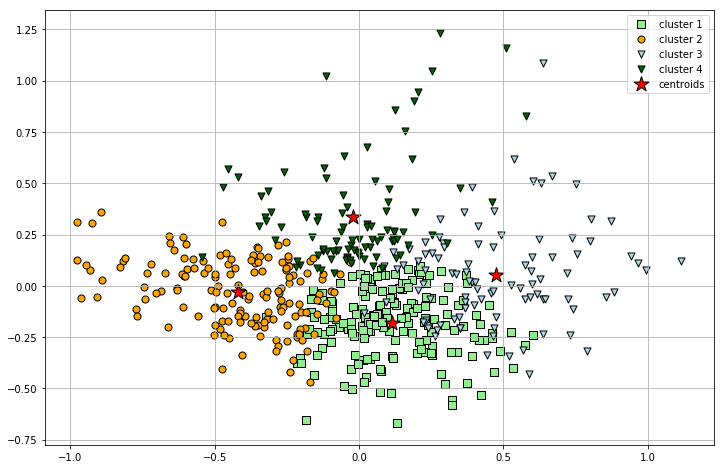

In [19]:
# plot the 3 clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))


plt.scatter(
    X2.values[y_km2 == 0, 0], X2.values[y_km2 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X2.values[y_km2 == 1, 0], X2.values[y_km2 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X2.values[y_km2 == 2, 0], X2.values[y_km2 == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X2.values[y_km2 == 3, 0], X2.values[y_km2 == 3, 1],
    s=50, c='darkgreen',
    marker='v', edgecolor='black',
    label='cluster 4'
)



plt.scatter(
    km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.grid()
plt.show()